# Imports & Settings

In [3]:
# Imports
import pandas                           as pd
import seaborn                          as sns 

from matplotlib           import pyplot as plt
from IPython.core.display import display, HTML

# Figure settings
%matplotlib inline
%pylab inline

plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25,12]
plt.rcParams['font.size'] = 25
sns.set()

# Jupter notebook settings
display( HTML( '<style>.container { width:100% !important; }<style>' ) )

Populating the interactive namespace from numpy and matplotlib


---
# 1. The Dataset Structure
---

## 1.1. Read Dataset

In [7]:
df_train = pd.read_csv( 'dataset/big_mart_train.csv' )
df_test = pd.read_csv( 'dataset/big_mart_test.csv' )

In [8]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


--- 
# 2. Exploration Data Analysis ( EDA )
--- 

## 2.1. Univariate Analysis

### 2.1.1. Response Variable: Item_Outlet_Sales

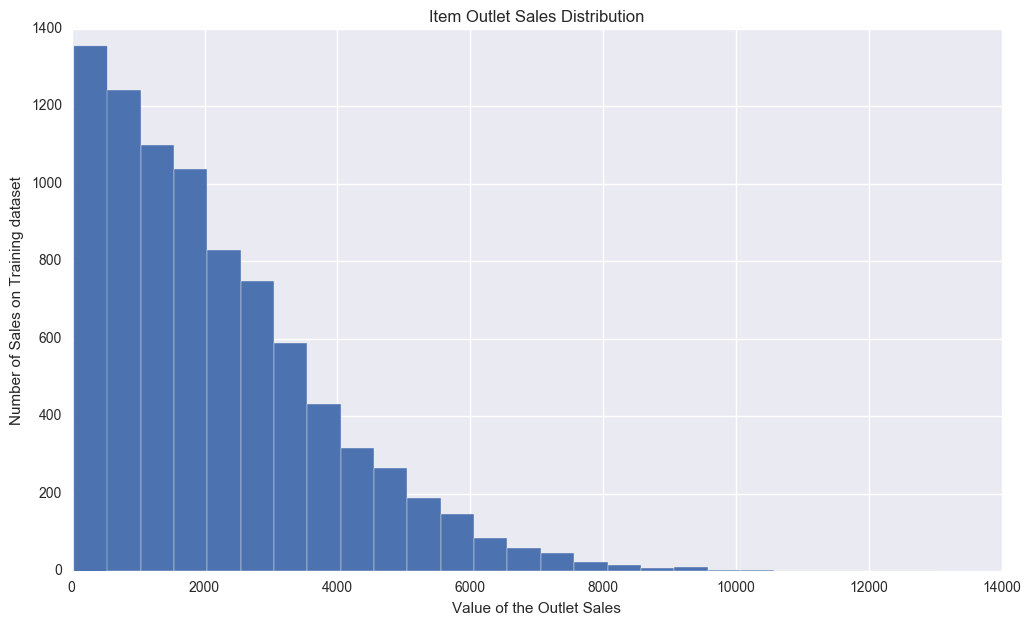

In [29]:
plt.figure( figsize=(12, 7))
plt.xlabel( 'Value of the Outlet Sales' )
plt.ylabel( 'Number of Sales on Training dataset' )
plt.title( 'Item Outlet Sales Distribution' )
df_train['Item_Outlet_Sales'].hist( bins=26 );

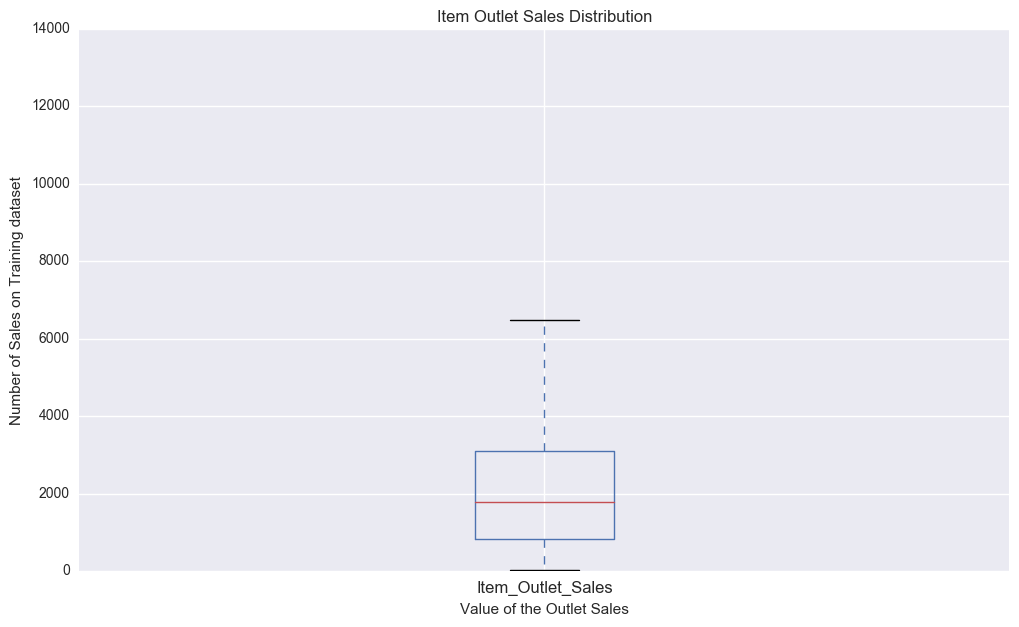

In [48]:
plt.figure( figsize=(12, 7))
plt.xlabel( 'Value of the Outlet Sales' )
plt.ylabel( 'Number of Sales on Training dataset' )
plt.title( 'Item Outlet Sales Distribution' )
df_train.boxplot( column='Item_Outlet_Sales' );

In [53]:
print( df_train['Item_Outlet_Sales'].min() )
print( df_train['Item_Outlet_Sales'].max() )
print( df_train['Item_Outlet_Sales'].mean() )
print( df_train['Item_Outlet_Sales'].median() )

33.29
13086.9648
2181.28891358
1794.3310000000001


### 2.1.2. Numerical Predictors

### 2.1.3. Categorial Predictors

## 2.2. Bivariate Analysis

### 2.2.1. Response Variable

### 2.2.2. Numerical Predictors

### 2.2.3. Categorial Predictors

---
# Data Pre-Processing 
---

---
# Feature Engineering
---

---
# Feature Transformation
---

---
# Modeling
---

---
# Hyperparameter tuning
---

---
# Ensembling
---